In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
All_season = pd.read_csv("Datasets/La_Liga/All_season")
# Title_secured = pd.read_excel("Datasets/Seasons/premier_league_title_secured.xlsx")

In [3]:
All_season.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes,Season,Goals scored by top team scorer,years_in_PL_after_promotion,Same_Rank_As_Last_Season,Promoted
0,1,Real Madrid,38,25,12,1,91,37,54,62,1.63,NaN,Hugo Sánchez,NaN,→ European Cup via league finish,1988-1989,27,1,0,NaN
1,2,Barcelona,38,23,11,4,80,26,54,57,1.50,NaN,Julio Salinas,NaN,→ European Cup Winners' Cup,1988-1989,20,1,0,NaN
2,3,Valencia,38,18,13,7,39,26,13,49,1.29,NaN,Fernando Gómez Colomer,NaN,→ UEFA Cup via league finish,1988-1989,14,1,0,NaN
3,4,Atlético Madrid,38,19,8,11,69,45,24,46,1.21,NaN,Baltazar Maria de Morais Júnior,NaN,→ UEFA Cup via league finish,1988-1989,35,1,0,NaN
4,5,Zaragoza,38,15,13,10,48,42,6,43,1.13,NaN,Juan Crespín,NaN,→ UEFA Cup via league finish,1988-1989,8,1,0,NaN


In [4]:
# Title_secured.head()

Lets answer the question - Is Premier League getting competitive

#### First of all, Lets understand how are we going to measure competitiveness of the league

#### Here are the few measure which will help understand and measure the competitiveness of the league
- Points distribution, Gap between the teams & Goal Difference distribution 
- How early the league title is decided?
- Number of different champions over time.
- Champions League & Relegation battle.


#### 1. Points distribution, Gap between the teams & Goal Difference distribution 

In [5]:
rank_1 = All_season.loc[All_season['Rk'] == 1]
atleast_top_4 = All_season.loc[All_season['Rk'] == 4]
mid_table = All_season.loc[(All_season['Rk'] >= 7) & (All_season['Rk'] <= 13 )]
escape_relegation = All_season.loc[(All_season['Rk'] >= 14) & (All_season['Rk'] <=17 )]
relegated = All_season.loc[(All_season['Rk'] >= 18) & (All_season['Rk'] <=20 )]

In [6]:
rank_1 = rank_1.copy()
relegated = relegated.copy()
atleast_top_4 = atleast_top_4.copy()
mid_table = mid_table.copy()
escape_relegation = escape_relegation.copy()

rank_1.loc[:,'Pts_moving_avg'] = rank_1['Pts'].rolling(window=10).mean()
relegated.loc[:, 'Pts_moving_avg_'] = relegated['Pts'].rolling(window=10).mean()
atleast_top_4.loc[:, 'Pts_moving_avg_'] = atleast_top_4['Pts'].rolling(window=10).mean()
mid_table.loc[:, 'Pts_moving_avg_'] = mid_table['Pts'].rolling(window=10).mean()
escape_relegation.loc[:, 'Pts_moving_avg_'] = escape_relegation['Pts'].rolling(window=10).mean()

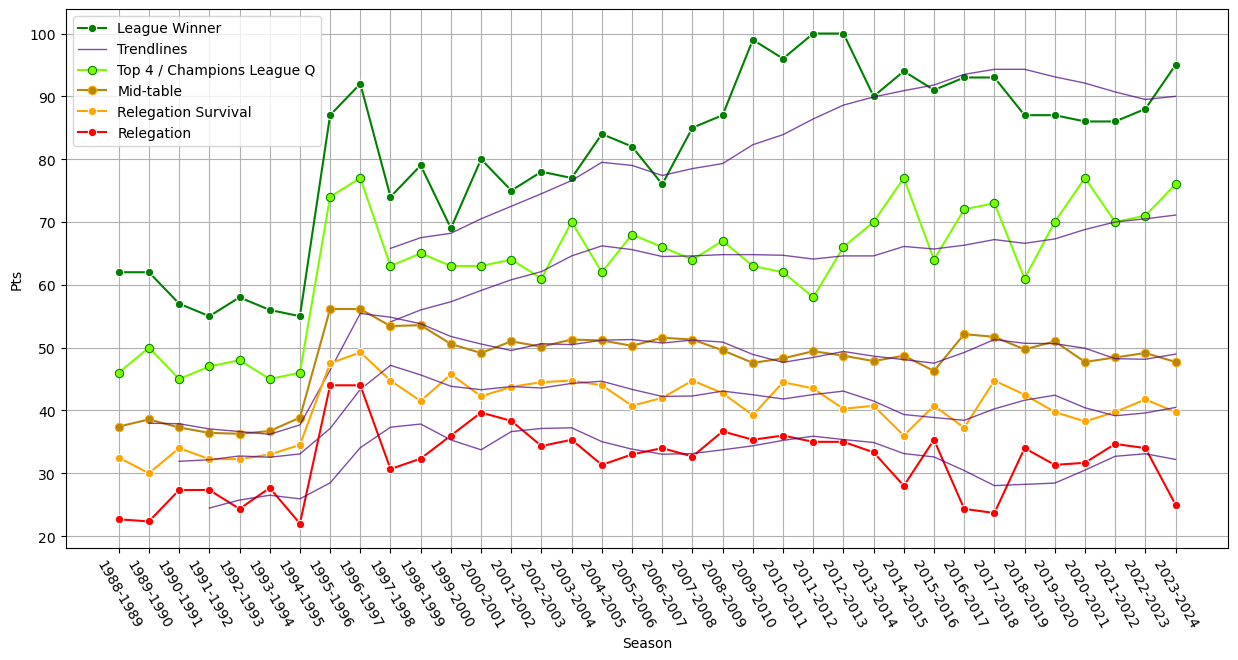

In [7]:
plt.figure(figsize=(15,7))
# Champion
sns.lineplot(data=rank_1,x='Season',y='Pts',c='g',marker="o",label= "League Winner")
sns.lineplot(data=rank_1,x='Season',y='Pts_moving_avg',c='indigo',linewidth=1,alpha=.7,label= "Trendlines") # Trendline
# Atlest top 4 or Champions league position.
sns.lineplot(data=atleast_top_4,x='Season',y='Pts',c='lawngreen',marker="o",ms = 6, mec = 'g',label= "Top 4 / Champions League Q")
sns.lineplot(data=atleast_top_4,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7) # Trendline
# Mid- Table clubs
sns.lineplot(data=mid_table,x='Season',y='Pts',c='darkgoldenrod',marker="o",errorbar=None,ms = 6, mec = 'orange',label= "Mid-table")
sns.lineplot(data=mid_table,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7,errorbar=None) # Trendline.
# # Escape_relegation
sns.lineplot(data=escape_relegation,x='Season',y='Pts',c='orange',marker="o",errorbar=None,label= "Relegation Survival")
sns.lineplot(data=escape_relegation,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7,errorbar=None) # Trendline
# Relegated 
sns.lineplot(data=relegated,x='Season',y='Pts',c='r',marker="o",errorbar=None,label= "Relegation")
sns.lineplot(data=relegated,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7,errorbar=None) # Trendline

plt.legend()
plt.grid()
x,y = plt.xticks(rotation=300)

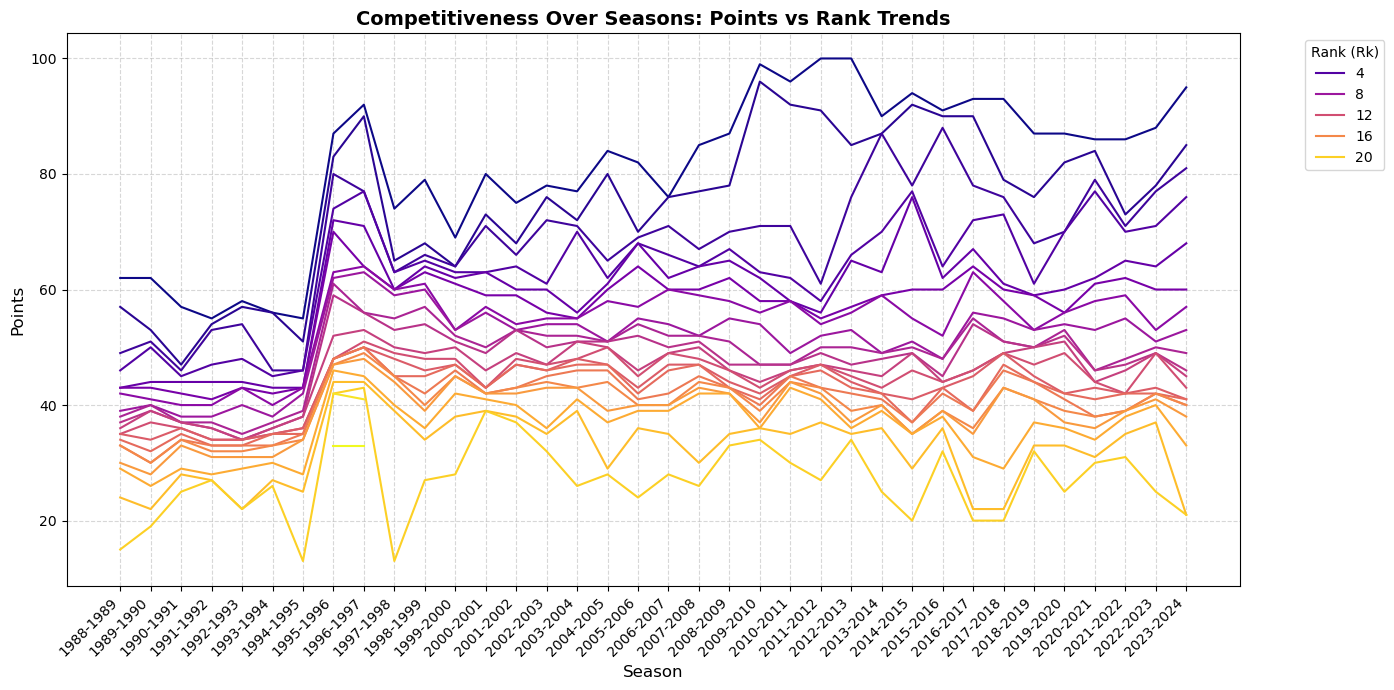

In [8]:
plt.figure(figsize=(14, 7))

# Improved colormap and better color control
sns.lineplot(
    data=All_season, 
    x='Season', 
    y='Pts', 
    hue='Rk', 
    palette='plasma',  
    alpha=1,        # Transparency to reduce overlap clutter
    linewidth=1.5     # Thicker lines for clarity
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add title and labels
plt.xlabel('Season', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.title('Competitiveness Over Seasons: Points vs Rank Trends', fontsize=14, fontweight='bold')

# Show legend outside the plot to avoid clutter
plt.legend(title="Rank (Rk)", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid label overlap
plt.tight_layout()

plt.show()

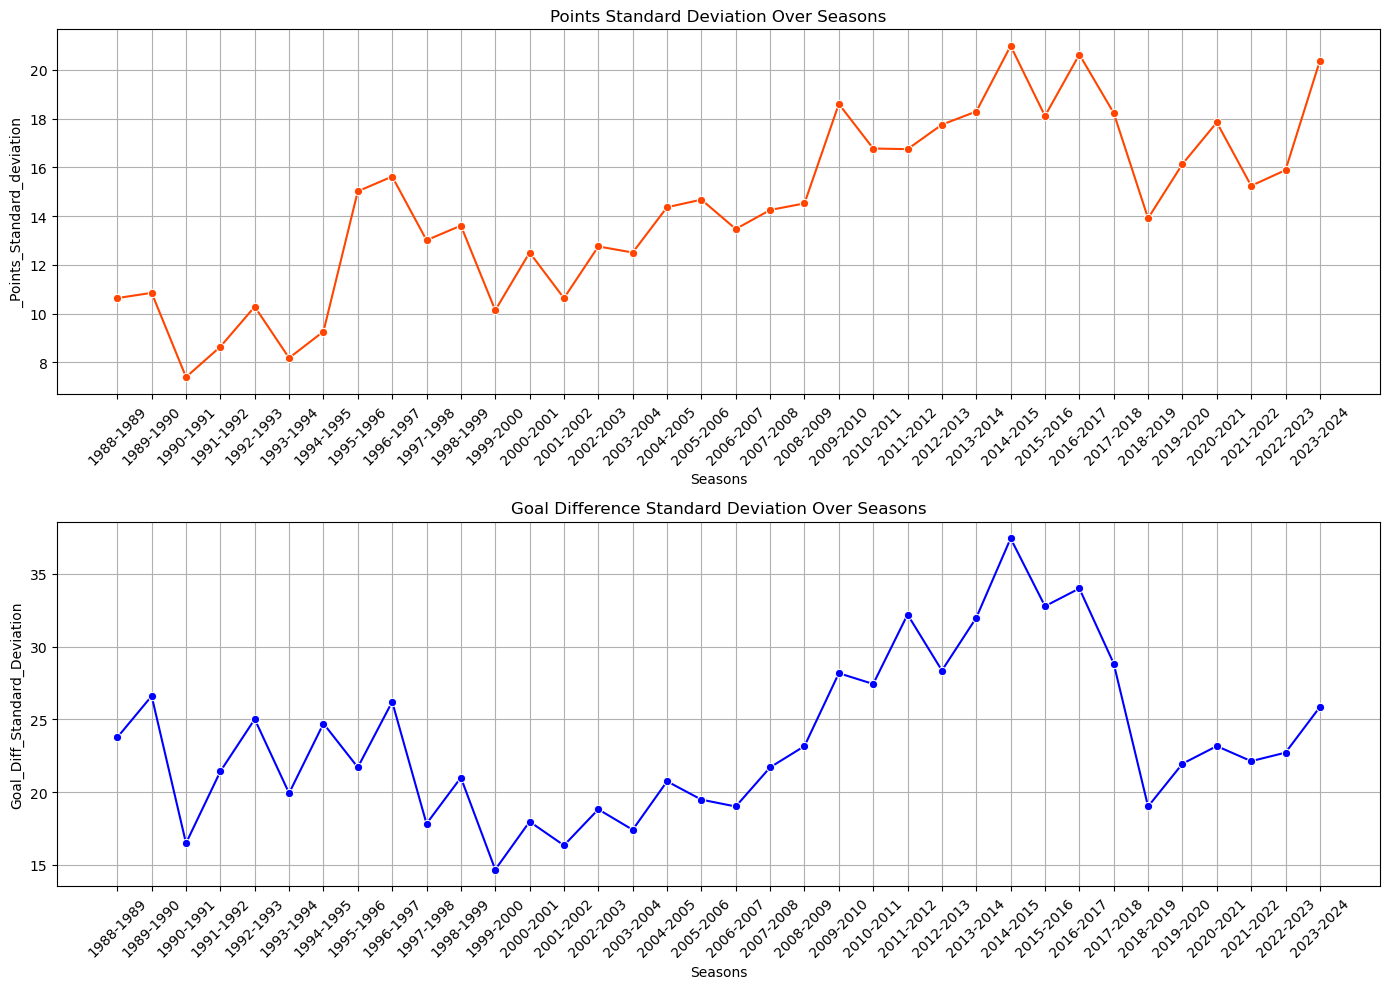

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
axes[0].grid(True)

competitive = All_season.groupby(by='Season')['Pts'].std().reset_index()
competitive.columns = ['Seasons','_Points_Standard_deviation']
sns.lineplot(ax=axes[0],data=competitive,y='_Points_Standard_deviation',x='Seasons',c='orangered',marker = "o")
axes[0].set_xticks(range(len(competitive['Seasons'])))  # Set tick positions
axes[0].set_xticklabels(competitive['Seasons'], rotation=45)  # Set tick labels
axes[0].set_title('Points Standard Deviation Over Seasons')
axes[0].grid(True)


# Goal difference standard deviation
goal_diff = All_season.groupby(by='Season')['GD'].std().reset_index()
goal_diff.columns = ['Seasons', 'Goal_Diff_Standard_Deviation']
sns.lineplot(ax=axes[1], data=goal_diff, y='Goal_Diff_Standard_Deviation', x='Seasons',c='blue',marker = "o")
axes[1].set_xticks(range(len(goal_diff['Seasons'])))  # Set tick positions
axes[1].set_xticklabels(goal_diff['Seasons'], rotation=45)  # Set tick labels
axes[1].set_title('Goal Difference Standard Deviation Over Seasons')
axes[1].grid(True)


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [10]:
Competitive_index = All_season.groupby(by=['Season']).agg(Champions = ('Squad', 'first')).reset_index()
Competitive_index.columns = ['Seasons', 'Champions']

Competitive_index = Competitive_index.loc[Competitive_index['Seasons'] >= '1988-1989']
Competitive_index

,Seasons,Champions
0,1988-1989,Real Madrid
1,1989-1990,Real Madrid
2,1990-1991,Barcelona
3,1991-1992,Barcelona
4,1992-1993,Barcelona
5,1993-1994,Barcelona
6,1994-1995,Real Madrid
7,1995-1996,Atlético Madrid
8,1996-1997,Real Madrid
9,1997-1998,Barcelona


In [11]:
# Competitive_index = Title_secured[Title_secured.columns[:-1]]
# Competitive_index.columns = ['Seasons', 'Champion', 'Matchday Title Secured']
# Competitive_index = Competitive_index.loc[Competitive_index['Seasons'] > '1988-1989']

In [12]:
competitive.head()

,Seasons,_Points_Standard_deviation
0,1988-1989,10.632621
1,1989-1990,10.848235
2,1990-1991,7.391318
3,1991-1992,8.638957
4,1992-1993,10.280283


In [13]:
goal_diff.head()

,Seasons,Goal_Diff_Standard_Deviation
0,1988-1989,23.761978
1,1989-1990,26.604313
2,1990-1991,16.492423
3,1991-1992,21.430426
4,1992-1993,25.015784


In [14]:
Competitive_index = Competitive_index.merge(competitive,on="Seasons",how="left")

In [15]:
Competitive_index = Competitive_index.merge(goal_diff,on="Seasons",how="left")

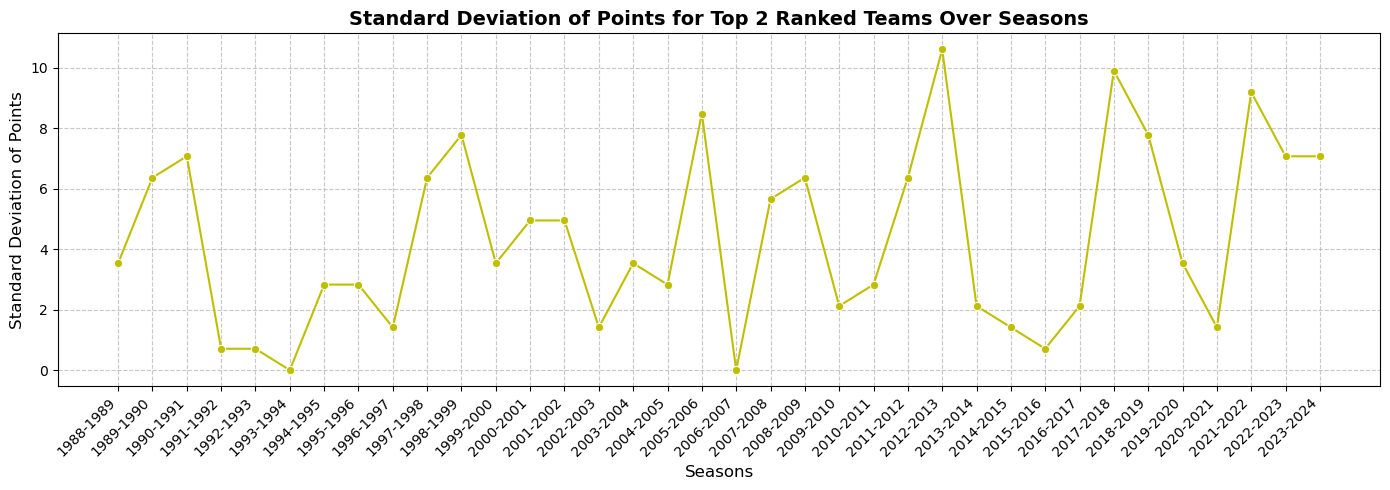

In [16]:
# Set figure size
plt.figure(figsize=(14, 5))

# Filter top 2 ranked teams
top_2_comp = All_season.loc[All_season['Rk'] <= 2]
top_2_comp = top_2_comp.groupby(by='Season')['Pts'].std().reset_index()
top_2_comp.columns = ['Seasons', 'Ttitle_race_Points_Standard_deviation']

# Create line plot with markers and styling
sns.lineplot(data=top_2_comp, x='Seasons', y='Ttitle_race_Points_Standard_deviation', marker='o', linestyle='-', color='y')

plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.xticks(range(len(top_2_comp['Seasons'])), top_2_comp['Seasons']) 

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Standard Deviation of Points', fontsize=12)
plt.title('Standard Deviation of Points for Top 2 Ranked Teams Over Seasons', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
top_2_comp.head()

,Seasons,Ttitle_race_Points_Standard_deviation
0,1988-1989,3.535534
1,1989-1990,6.363961
2,1990-1991,7.071068
3,1991-1992,0.707107
4,1992-1993,0.707107


In [18]:
Competitive_index = Competitive_index.merge(top_2_comp,on="Seasons",how="left")

In [19]:
Competitive_index

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation
0,1988-1989,Real Madrid,10.632621,23.761978,3.535534
1,1989-1990,Real Madrid,10.848235,26.604313,6.363961
2,1990-1991,Barcelona,7.391318,16.492423,7.071068
3,1991-1992,Barcelona,8.638957,21.430426,0.707107
4,1992-1993,Barcelona,10.280283,25.015784,0.707107
5,1993-1994,Barcelona,8.175702,19.928821,0.000000
6,1994-1995,Real Madrid,9.262261,24.715220,2.828427
7,1995-1996,Atlético Madrid,15.013991,21.705825,2.828427
8,1996-1997,Real Madrid,15.619460,26.211593,1.414214
9,1997-1998,Barcelona,13.008095,17.832555,6.363961


#### 2. How early the league title is decided?

In [20]:
# Title_secured.head()

In [21]:
# plt.figure(figsize=(14, 5))

# sns.lineplot(data=Title_secured,x="Season",y="Matchday Title Secured", marker='o', linestyle='-', color='g')
# plt.xticks(rotation=45, ha='right')  # Rotate for better readability

# # Add grid, title, and labels
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.xlabel('Seasons', fontsize=12)
# plt.ylabel('Matchday Title Secured', fontsize=12)
# plt.title('Matchdays on which the title was secured over seasons', fontsize=14, fontweight='bold')

# # Adjust layout
# plt.tight_layout()
# plt.show()

#### 3. Number of different champions over time.

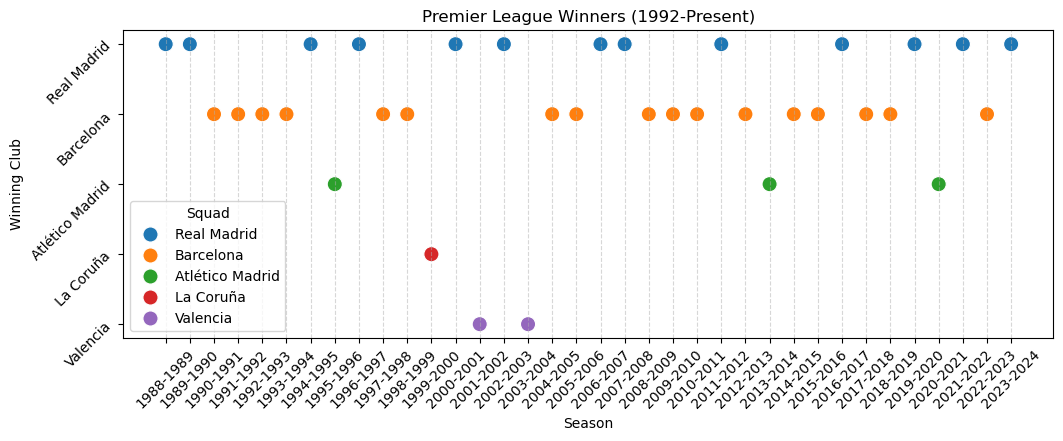

In [22]:
rank_1[['Squad','Season']]
plt.figure(figsize=(12,4))
sns.scatterplot(data=rank_1 ,x= 'Season',y='Squad',marker = "o",hue="Squad",s= 120)
plt.xlabel("Season")
plt.ylabel("Winning Club")
plt.title("Premier League Winners (1992-Present)")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [23]:
Competitive_index.head()

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation
0,1988-1989,Real Madrid,10.632621,23.761978,3.535534
1,1989-1990,Real Madrid,10.848235,26.604313,6.363961
2,1990-1991,Barcelona,7.391318,16.492423,7.071068
3,1991-1992,Barcelona,8.638957,21.430426,0.707107
4,1992-1993,Barcelona,10.280283,25.015784,0.707107


In [24]:
Competitive_index['Year'] = list(range(1988, 2024))

In [25]:
Competitive_index

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation,Year
0,1988-1989,Real Madrid,10.632621,23.761978,3.535534,1988
1,1989-1990,Real Madrid,10.848235,26.604313,6.363961,1989
2,1990-1991,Barcelona,7.391318,16.492423,7.071068,1990
3,1991-1992,Barcelona,8.638957,21.430426,0.707107,1991
4,1992-1993,Barcelona,10.280283,25.015784,0.707107,1992
5,1993-1994,Barcelona,8.175702,19.928821,0.000000,1993
6,1994-1995,Real Madrid,9.262261,24.715220,2.828427,1994
7,1995-1996,Atlético Madrid,15.013991,21.705825,2.828427,1995
8,1996-1997,Real Madrid,15.619460,26.211593,1.414214,1996
9,1997-1998,Barcelona,13.008095,17.832555,6.363961,1997


In [26]:
Competitive_index['Unique_Champions_Last_5'] = Competitive_index.apply(
    lambda row: Competitive_index[(Competitive_index['Year'] >= row['Year'] - 4) & (Competitive_index['Year'] <= row['Year'])]['Champions'].nunique(),
    axis=1
)

Competitive_index

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation,Year,Unique_Champions_Last_5
0,1988-1989,Real Madrid,10.632621,23.761978,3.535534,1988,1
1,1989-1990,Real Madrid,10.848235,26.604313,6.363961,1989,1
2,1990-1991,Barcelona,7.391318,16.492423,7.071068,1990,2
3,1991-1992,Barcelona,8.638957,21.430426,0.707107,1991,2
4,1992-1993,Barcelona,10.280283,25.015784,0.707107,1992,2
5,1993-1994,Barcelona,8.175702,19.928821,0.000000,1993,2
6,1994-1995,Real Madrid,9.262261,24.715220,2.828427,1994,2
7,1995-1996,Atlético Madrid,15.013991,21.705825,2.828427,1995,3
8,1996-1997,Real Madrid,15.619460,26.211593,1.414214,1996,3
9,1997-1998,Barcelona,13.008095,17.832555,6.363961,1997,3


#### 4. Champions League & Relegation battle.

In [27]:
Champion_league_battle = All_season.loc[All_season['Rk'] < 7]
Relegation_battles = All_season.loc[All_season['Rk'] > 14]

In [28]:
Champion_league_battle_std = Champion_league_battle.groupby(by='Season')['Pts'].std().reset_index()
Champion_league_battle_std.columns = ['Seasons', 'UCL_race_Points_Standard_deviation']
Champion_league_battle_std.head()

,Seasons,UCL_race_Points_Standard_deviation
0,1988-1989,7.848567
1,1989-1990,6.892024
2,1990-1991,5.269409
3,1991-1992,5.830952
4,1992-1993,6.562520


In [29]:
Relegation_battles_std = Relegation_battles.groupby(by='Season')['Pts'].std().reset_index()
Relegation_battles_std.columns = ['Seasons', 'Relegation_battle_Points_Standard_deviation']
Relegation_battles_std.head()

,Seasons,Relegation_battle_Points_Standard_deviation
0,1988-1989,6.889606
1,1989-1990,4.490731
2,1990-1991,3.728270
3,1991-1992,2.658320
4,1992-1993,4.956477


In [30]:
All_season.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes', 'Season',
       'Goals scored by top team scorer', 'years_in_PL_after_promotion',
       'Same_Rank_As_Last_Season', 'Promoted'],
      dtype='object')

In [31]:
Competitive_index = Competitive_index.merge(Champion_league_battle_std,on="Seasons",how="left")

In [32]:
Competitive_index = Competitive_index.merge(Relegation_battles_std,on="Seasons",how="left")

#### 4. Teams with Same  Rank As Last Season

In [33]:
Same_Rank_As_Last_Season = All_season.groupby(by='Season')['Same_Rank_As_Last_Season'].sum().reset_index()
Same_Rank_As_Last_Season.columns = ['Seasons', 'Same_Rank_As_Last_Season']
Same_Rank_As_Last_Season

,Seasons,Same_Rank_As_Last_Season
0,1988-1989,0
1,1989-1990,4
2,1990-1991,1
3,1991-1992,4
4,1992-1993,3
5,1993-1994,1
6,1994-1995,3
7,1995-1996,1
8,1996-1997,0
9,1997-1998,0


In [34]:
Competitive_index = Competitive_index.merge(Same_Rank_As_Last_Season,on="Seasons",how="left")

In [35]:
Competitive_index

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation,Year,Unique_Champions_Last_5,UCL_race_Points_Standard_deviation,Relegation_battle_Points_Standard_deviation,Same_Rank_As_Last_Season
0,1988-1989,Real Madrid,10.632621,23.761978,3.535534,1988,1,7.848567,6.889606,0
1,1989-1990,Real Madrid,10.848235,26.604313,6.363961,1989,1,6.892024,4.490731,4
2,1990-1991,Barcelona,7.391318,16.492423,7.071068,1990,2,5.269409,3.728270,1
3,1991-1992,Barcelona,8.638957,21.430426,0.707107,1991,2,5.830952,2.658320,4
4,1992-1993,Barcelona,10.280283,25.015784,0.707107,1992,2,6.562520,4.956477,3
5,1993-1994,Barcelona,8.175702,19.928821,0.000000,1993,2,6.356099,2.966479,1
6,1994-1995,Real Madrid,9.262261,24.715220,2.828427,1994,2,4.760952,8.424172,3
7,1995-1996,Atlético Madrid,15.013991,21.705825,2.828427,1995,3,6.713171,4.867898,1
8,1996-1997,Real Madrid,15.619460,26.211593,1.414214,1996,3,10.821275,5.462535,0
9,1997-1998,Barcelona,13.008095,17.832555,6.363961,1997,3,5.192944,12.355835,0


In [36]:
np.array(Competitive_index['Goal_Diff_Standard_Deviation'])

array([23.76197759, 26.60431307, 16.4924225 , 21.43042598, 25.01578449,
       19.92882071, 24.71522011, 21.70582542, 26.21159322, 17.8325545 ,
       21.0012531 , 14.67902191, 17.97659297, 16.34496542, 18.82048156,
       17.41445256, 20.74405432, 19.48548718, 19.01522935, 21.70617181,
       23.16530982, 28.17426971, 27.43413164, 32.20493588, 28.35860586,
       31.9835484 , 37.43626162, 32.77836257, 33.99535572, 28.83893567,
       19.01522935, 21.9544984 , 23.16530982, 22.13118781, 22.71563338,
       25.8497684 ])

In [37]:
def MinMax_Scaling(feature):
    feat = np.array(feature)
    min_,max_ = np.min(feat),np.max(feat)
    scaling = (feat- min_)/(max_- min_)
    return scaling

In [38]:
Competitive_index_scaled = Competitive_index[['Seasons','Champions']]

In [39]:
# Step 1: Ensure you're working on a proper copy
Competitive_index_scaled = Competitive_index.copy()

# Step 2: Assign scaled values safely using .loc
# Competitive_index_scaled.loc[:, 'Matchday Title Secured'] = MinMax_Scaling(Competitive_index['Matchday Title Secured'])
Competitive_index_scaled.loc[:, '_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Goal_Diff_Standard_Deviation'] = MinMax_Scaling(Competitive_index['Goal_Diff_Standard_Deviation'])
Competitive_index_scaled.loc[:, 'Ttitle_race_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['Ttitle_race_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Unique_Champions_Last_5'] = MinMax_Scaling(Competitive_index['Unique_Champions_Last_5'])
Competitive_index_scaled.loc[:, 'UCL_race_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['UCL_race_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Relegation_battle_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['Relegation_battle_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Same_Rank_As_Last_Season'] = MinMax_Scaling(Competitive_index['Same_Rank_As_Last_Season'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_5116\3395482283.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.66666667 0.66666667 0.66666667 0.66666667 1.
 0.66666667 1.         1.         0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.33333333 0.33333333 0.66666667 0.66666667 0.66666667 0.66666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Competitive_index_scaled.loc[:, 'Unique_Champions_Last_5'] = MinMax_Scaling(Competitive_index['Unique_Champions_Last_5'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_5116\3395482283.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.  0.8 0.2 0.8 0.6 0.2

In [40]:
Competitive_index_scaled

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation,Year,Unique_Champions_Last_5,UCL_race_Points_Standard_deviation,Relegation_battle_Points_Standard_deviation,Same_Rank_As_Last_Season
0,1988-1989,Real Madrid,0.238548,0.399124,0.333333,1988,0.000000,0.295191,0.497768,0.0
1,1989-1990,Real Madrid,0.254417,0.524022,0.600000,1989,0.000000,0.239407,0.277362,0.8
2,1990-1991,Barcelona,0.000000,0.079685,0.666667,1990,0.333333,0.144778,0.207308,0.2
3,1991-1992,Barcelona,0.091822,0.296671,0.066667,1991,0.333333,0.177526,0.109002,0.8
4,1992-1993,Barcelona,0.212617,0.454219,0.066667,1992,0.333333,0.220190,0.320154,0.6
5,1993-1994,Barcelona,0.057728,0.230687,0.000000,1993,0.333333,0.208152,0.137315,0.2
6,1994-1995,Real Madrid,0.137695,0.441011,0.266667,1994,0.333333,0.115126,0.638763,0.6
7,1995-1996,Atlético Madrid,0.561001,0.308772,0.266667,1995,0.666667,0.228976,0.312015,0.2
8,1996-1997,Real Madrid,0.605562,0.506765,0.133333,1996,0.666667,0.468555,0.366650,0.0
9,1997-1998,Barcelona,0.413375,0.138573,0.600000,1997,0.666667,0.140319,1.000000,0.0


In [41]:
# Define weights for each feature
weights = {
    # 'Matchday Title Secured': 0.125,
    '_Points_Standard_deviation': 0.142,
    'Goal_Diff_Standard_Deviation': 0.142,
    'Ttitle_race_Points_Standard_deviation': 0.142,
    'Unique_Champions_Last_5': 0.142,
    'UCL_race_Points_Standard_deviation': 0.142,
    'Relegation_battle_Points_Standard_deviation': 0.142,
    'Same_Rank_As_Last_Season': 0.142
}

# Multiply each column by its corresponding weight and sum to get Competitive_Index
Competitive_index_scaled['Competitive_Index'] = (
    # Competitive_index_scaled['Matchday Title Secured'] * weights['Matchday Title Secured'] +
   (1 - Competitive_index_scaled['_Points_Standard_deviation']) * weights['_Points_Standard_deviation'] +
   (1 - Competitive_index_scaled['Goal_Diff_Standard_Deviation']) * weights['Goal_Diff_Standard_Deviation'] +
    (1- Competitive_index_scaled['Ttitle_race_Points_Standard_deviation']) * weights['Ttitle_race_Points_Standard_deviation'] +
    Competitive_index_scaled['Unique_Champions_Last_5'] * weights['Unique_Champions_Last_5'] +
    (1- Competitive_index_scaled['UCL_race_Points_Standard_deviation']) * weights['UCL_race_Points_Standard_deviation'] +
    (1- Competitive_index_scaled['Relegation_battle_Points_Standard_deviation']) * weights['Relegation_battle_Points_Standard_deviation'] +
    Competitive_index_scaled['Same_Rank_As_Last_Season'] * weights['Same_Rank_As_Last_Season']
    
)


In [42]:
final_table = Competitive_index_scaled[['Seasons','Champions','Competitive_Index']]
final_table

,Seasons,Champions,Competitive_Index
0,1988-1989,Real Madrid,0.459517
1,1989-1990,Real Madrid,0.554481
2,1990-1991,Barcelona,0.629755
3,1991-1992,Barcelona,0.765614
4,1992-1993,Barcelona,0.661647
5,1993-1994,Barcelona,0.695722
6,1994-1995,Real Madrid,0.615438
7,1995-1996,Atlético Madrid,0.594871
8,1996-1997,Real Madrid,0.509184
9,1997-1998,Barcelona,0.479165


In [43]:
final_table['Competitive_Index_trend'] = final_table['Competitive_Index'].rolling(window=5).mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5116\3880509263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table['Competitive_Index_trend'] = final_table['Competitive_Index'].rolling(window=5).mean()


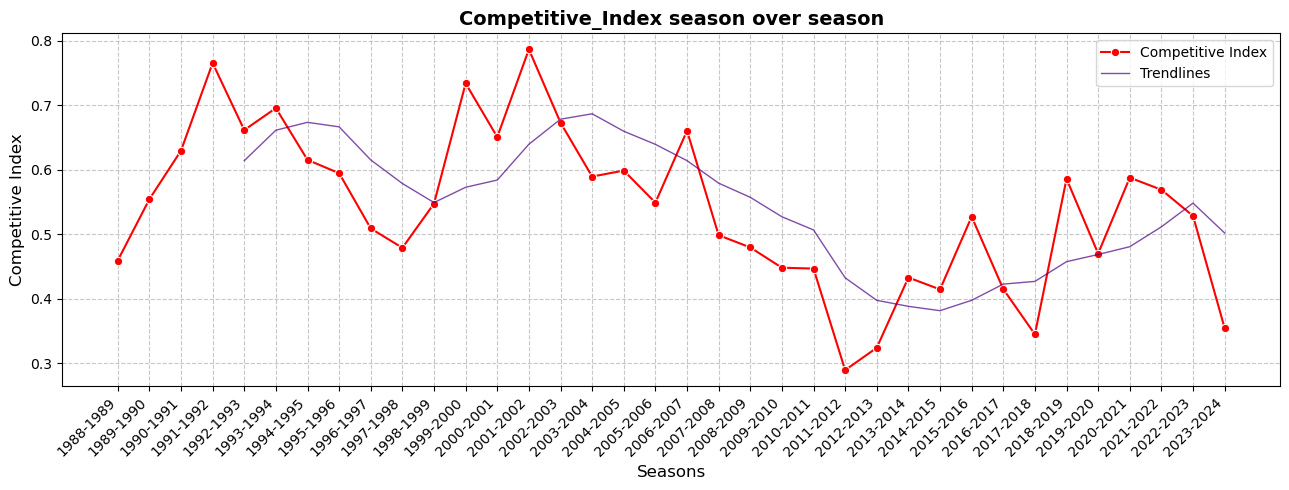

In [44]:

plt.figure(figsize=(13, 5))

sns.lineplot(data=final_table,x="Seasons",y="Competitive_Index", marker='o', linestyle='-', color='r',label= "Competitive Index")
sns.lineplot(data=final_table,x='Seasons',y='Competitive_Index_trend',c='indigo',linewidth=1,alpha=.7,label= "Trendlines") # Trendline

plt.xticks(rotation=45, ha='right')  # Rotate for better readability

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Competitive Index', fontsize=12)
plt.title('Competitive_Index season over season', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()